<a href="https://colab.research.google.com/github/Amey-CK/Linear_Regression/blob/main/Copy_of_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

Text(0.5, 0, 'Ground Temperature')

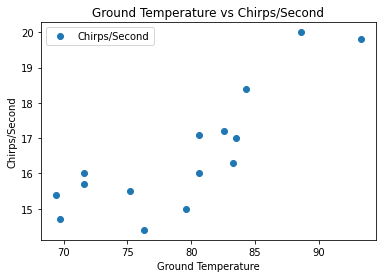

In [ ]:
df.plot(x='Ground Temperature', y='Chirps/Second',style='o')
plt.title('Ground Temperature vs Chirps/Second')
plt.ylabel('Chirps/Second')
plt.xlabel('Ground Temperature')

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


There is Linear relationship between Chirps/Second and Ground Temperature. No transfomation required.

DATA PREPROCESSING

In [ ]:
x=df.loc[:,['Ground Temperature']]
y=df.loc[:,['Chirps/Second']]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [ ]:
print(regressor.coef_)

[[0.20299973]]


In [ ]:
print(regressor.intercept_)

[0.45931465]


In [ ]:
y_pred=regressor.predict(x_test)
print(y_pred)

[[17.572192  ]
 [14.99409541]
 [14.60839592]]


Equation is Chirps/SecondGround Temperature = 0.20299973 * (Ground Temperature) + 0.45931465

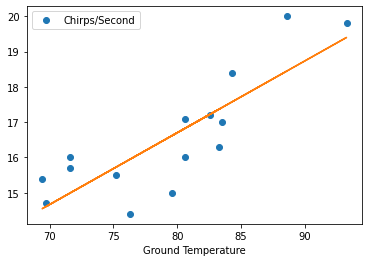

In [ ]:
#p=df.groupby('Chirps/Second')['Ground Temperature'].plot()
p=df.plot(y='Chirps/Second',x='Ground Temperature',style='o')
p.plot(x,0.20299973*x+ 0.45931465)#,linestyle='-')

In [ ]:
from sklearn import metrics
print('R_2 score',metrics.r2_score(y_test,y_pred))

R_2 score 0.8373122832725096


r2_score is 0.837 which is above 0.8. There is a strong correlation.

EXTRAPOLATON

In [ ]:
T1=np.array(int(input('Enter temperature: '))).reshape(-1,1)
print(regressor.predict(T1))

Enter temperature: 95
[[19.74428913]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


INTERPOLATION

In [ ]:
temperature= (int(input('chirps/second: '))- 0.45931465)/0.20299973
temperature

chirps/second: 18


86.40743192121488